In [1]:
#matplotlib inline

import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np


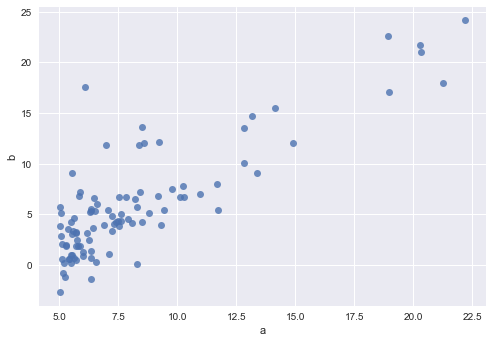

In [2]:
#read data
dataframe = pd.read_csv('challenge_dataset.data', sep=",", header=None, names = ['a', 'b'])

sns.regplot(x='a', y='b', data=dataframe, fit_reg=False)
plt.show()


In [3]:
# 2D Regression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = np.asarray(train_test_split(dataframe['a'], dataframe['b'], test_size=0.1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

/Users/shankar/tensorflow/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print('Score: ', reg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1)))

('Score: ', 0.36446604031222052)


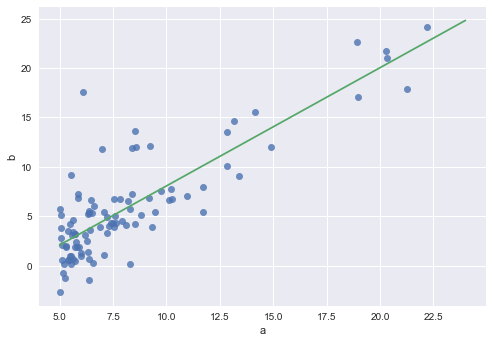

In [5]:
# Plot regressio and visualize results

x_line = np.arange(5, 25).reshape(-1, 1)
sns.regplot(x=dataframe['a'], y=dataframe['b'], data=dataframe, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

In [15]:
# 3 Variables
co2_df = pd.read_csv('global_co2.data')
temp_df = pd.read_csv('annual_temp.data')
print(co2_df.head())
print(temp_df.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [16]:
# Clean Data
co2_df = co2_df.ix[:,:2] # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]
co2_df.columns = ['Year', 'CO2']
co2_df = co2_df.reset_index(drop=True)
print(co2_df.head())

temp_df = temp_df[temp_df.Source != 'GISTEMP']
temp_df.drop('Source', inplace=True, axis=1)
temp_df = temp_df.reindex(index=temp_df.index[::-1])
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]
temp_df.columns = ['Year', 'Temperature']
temp_df = temp_df.reset_index(drop=True)

print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  1960       0.0252
1  1961       0.0818
2  1962       0.0924
3  1963       0.1100
4  1964      -0.1461


In [17]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0252
1  1961  2580       0.0818
2  1962  2686       0.0924
3  1963  2833       0.1100
4  1964  2995      -0.1461


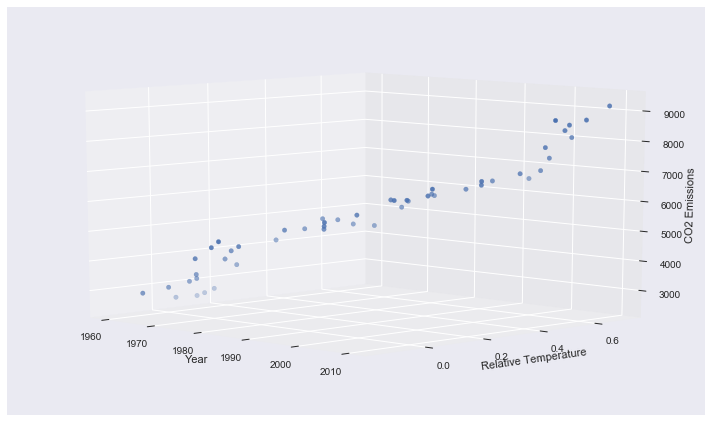

In [18]:
# Visualize Input
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = climate_change_df['Year'], ys=climate_change_df['Temperature'], zs = climate_change_df['CO2'])

ax.set_ylabel('Relative Temperature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)
plt.show()

In [19]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative Temperature')

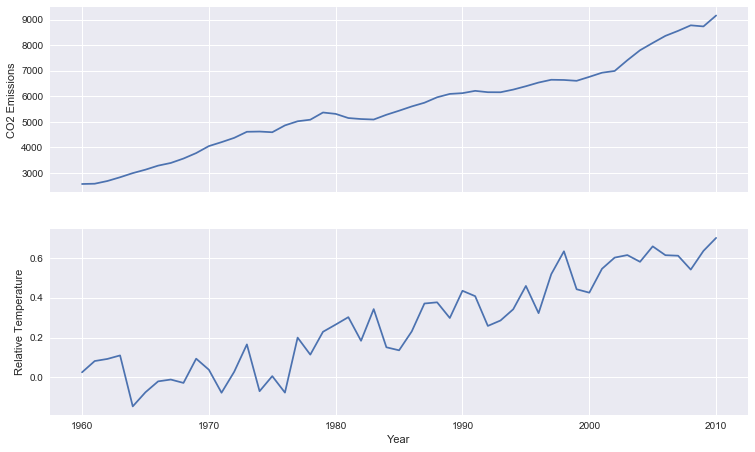

In [20]:
plt.show()

In [21]:
# Linear Regression
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

('Score: ', 0.93795462741689162)


In [23]:
x_line = np.arange(1960, 2011).reshape(-1, 1)
p = reg.predict(x_line).T

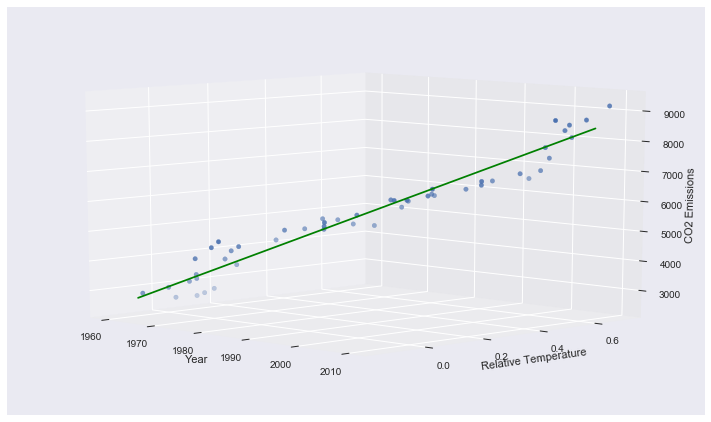

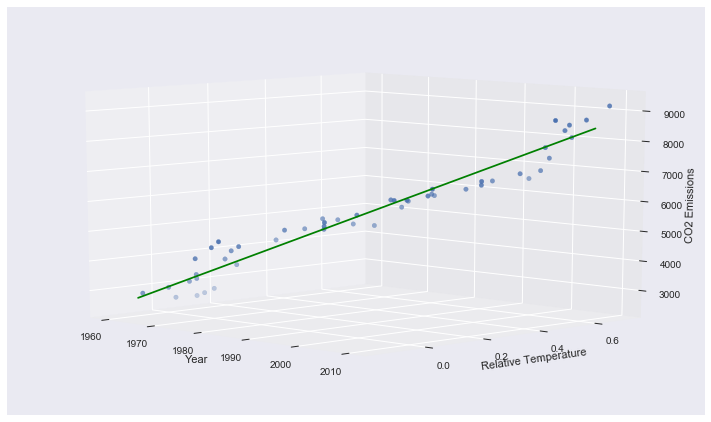

In [25]:
fig2  = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs= climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative Temperature')
ax.set_xlabel('Year')
ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)
plt.show()

In [26]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative Temperature')

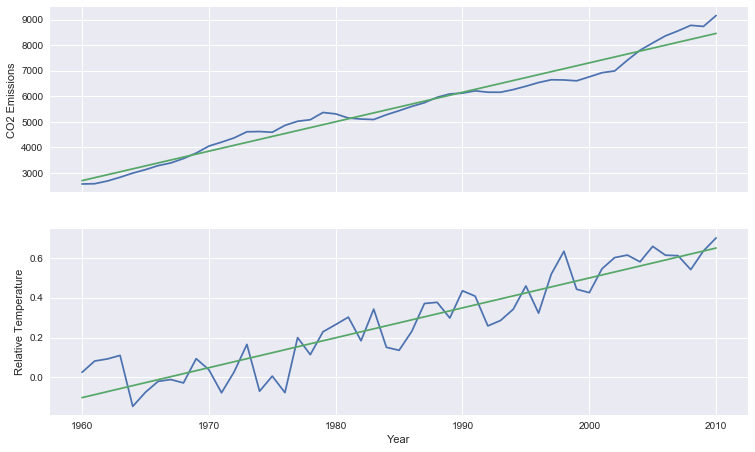

In [27]:
plt.show()